<a href="https://colab.research.google.com/github/ElenaManari/MLPNS_EManari/blob/main/Elena_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline
from google.colab import drive
drive.mount('/content/drive')


Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data

Data Dictionary (Dataset semantics) http://opendata.cern.ch/record/328


In [29]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [30]:
!kaggle --version

Kaggle API 1.5.13


In [31]:
cd drive/My\ Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/.kaggle


In [32]:
ls -l *kaggle*

-rw------- 1 root root 67 Apr 13 15:13 kaggle.json


In [33]:
cd .kaggle/

[Errno 2] No such file or directory: '.kaggle/'
/content/drive/My Drive/.kaggle


In [34]:
envs = json.load(open('kaggle.json','r'))

In [35]:
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [36]:
!kaggle competitions download -c higgs-boson

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  kaggle.json		test.zip
higgs-boson.zip				 random_submission.zip	training.zip


In [38]:
higgs = pd.read_csv('training.zip')

In [39]:
higgs.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [40]:
higgs.columns  # target variables : weight, label

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [41]:
higgs[['Weight', 'Label','EventId']].describe()


,Weight,EventId
count,250000.000000,250000.000000
mean,1.646767,224999.500000
std,1.875103,72168.927986
min,0.001502,100000.000000
25%,0.018636,162499.750000
50%,1.156188,224999.500000
75%,2.404128,287499.250000
max,7.822543,349999.000000


In [42]:
labels = higgs['Label'].values
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [43]:
weights = higgs['Weight'].values
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [44]:
X =higgs.drop(columns=['Weight', 'Label','EventId']).values
X.shape

(250000, 30)

In [45]:
# leave
from sklearn.model_selection import train_test_split 
X_train,X_test,labels_train,labels_test,weights_train,werights_test=train_test_split(X,labels,weights,train_size=0.75,test_size=0.25,stratify=labels)


- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [46]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [47]:
gbt = GradientBoostingClassifier(random_state=0)

In [48]:
X_train.shape

(187500, 30)

In [50]:
rf.fit(X_train,labels_train)
gbt.fit(X_train,labels_train)

GradientBoostingClassifier(random_state=0)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [51]:
rf.score(X_train,labels_train), rf.score(X_test,labels_test)

(0.9999893333333333, 0.83864)

In [52]:
gbt.score(X_train,labels_train), gbt.score(X_test,labels_test)

(0.832864, 0.833216)

# Dal confronto dei risultati si vede che il Random forest produce overfitting, come è possibile vedere dal confronto fra rf.score applicato asl train test che da un numero prossimo a uno, mentre 0.8 per rf applicato al test set, mentre il Gradient Boost Classifier no, come è possibile vedere dai duye valori di 0.8 sia per il train che per il test set.

- Produce a confusion matrix for each model and compare them


 



In [53]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)
    

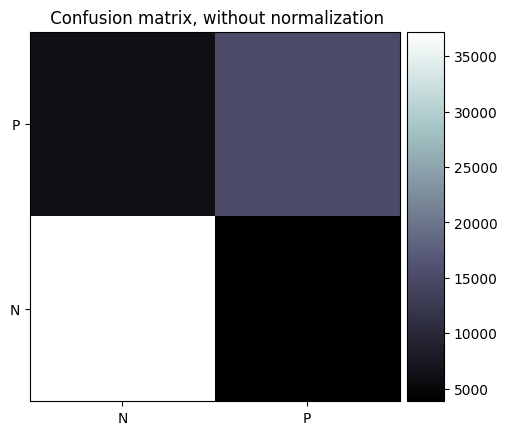

In [55]:
plot_confusion_matrix(labels_test, rf.predict(X_test) ) # pred

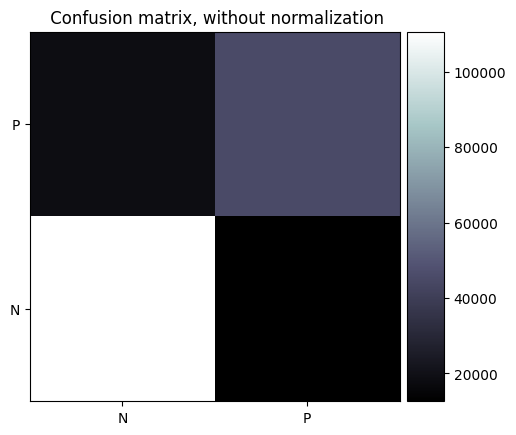

In [58]:
plot_confusion_matrix(labels_train, gbt.predict(X_train) ) 


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [62]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(X_train, weights_train)
gbtR =GradientBoostingRegressor(random_state=0)
gbtR.fit(X_train,weights_train)

GradientBoostingRegressor(random_state=0)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [69]:
L1rf = np.sum(np.abs(rfR.predict(X_test)-werights_test))
L2rf = np.sum((rfR.predict(X_test)-werights_test)**2)
L1gbt = np.sum(np.abs(gbtR.predict(X_test)-werights_test))
L2gbt = np.sum((gbtR.predict(X_test)-werights_test)**2)
print(L1gbt)
print(L2gbt)
print(L1rf)
print(L2rf)


52616.902296830754
84786.25180400538
62816.37399888487
114345.19936680388


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [81]:
inds = np.argsort(rfR.feature_importances_)
best_features_index = rfR.feature_importances_[inds[-4:]]

In [94]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
X_train2 = X_train[:,inds[-4:]]
RandomForestRegressor()
random_grid={'n_estimators':[1,10],'max_depth':[3,10,None],'bootstrap':[True,False],'max_features':['auto','sqrt']}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [1, 10]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [95]:
higgs.iloc[:, best_features_index]

,EventId,EventId,EventId,EventId
0,100000,100000,100000,100000
1,100001,100001,100001,100001
2,100002,100002,100002,100002
3,100003,100003,100003,100003
4,100004,100004,100004,100004
...,...,...,...,...
249995,349995,349995,349995,349995
249996,349996,349996,349996,349996
249997,349997,349997,349997,349997
249998,349998,349998,349998,349998


In [96]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [97]:
random_search.fit(X_train2,labels_train)
                  

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [1, 10]})

In [ ]:
print("Tuned RF  Parameters: {}".format(...))
print("Best score is {}".format(...))


In [ ]:
df = pd.DataFrame(random_search.cv_results_)


In [ ]:
df

# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
